In [750]:
import pandas as pd
import numpy as np
import seaborn as sns

In [751]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [752]:
train.dtypes

Id                         object
Property_Type              object
Property_Area               int64
Number_of_Windows         float64
Number_of_Doors             int64
Furnishing                 object
Frequency_of_Powercuts    float64
Power_Backup               object
Water_Supply               object
Traffic_Density_Score     float64
Crime_Rate                 object
Dust_and_Noise             object
Air_Quality_Index         float64
Neighborhood_Review       float64
Habitability_score        float64
dtype: object

In [753]:
train["Property_Type"].unique()

array(['Apartment', 'Bungalow', 'Single-family home', 'Duplex',
       '#R%$G&867', 'Container Home'], dtype=object)

In [754]:
null_values_exist = train["Neighborhood_Review"].isnull().values.any()

# Print the result
if null_values_exist:
    print("Null values exist in the DataFrame.")
else:
    print("No null values found in the DataFrame.")

No null values found in the DataFrame.


In [755]:
train["Property_Type"].value_counts()

Property_Type
Apartment             11673
Single-family home     9146
Duplex                 4671
Bungalow               3392
Container Home         2310
#R%$G&867               407
Name: count, dtype: int64

In [756]:
from sklearn.preprocessing import OneHotEncoder

ohe1 = OneHotEncoder()
feature_array_1 = ohe1.fit_transform(train[["Property_Type"]]).toarray()
feature_labels_1 = ohe1.categories_
feature_labels_1 = np.array(feature_labels_1).ravel()
features_1 = pd.DataFrame(feature_array_1 , columns=feature_labels_1)
train = pd.concat([train , features_1] , axis = 1)

ohe2 = OneHotEncoder()
feature_array_2 = ohe2.fit_transform(test[["Property_Type"]]).toarray()
feature_labels_2 = ohe2.categories_
feature_labels_2 = np.array(feature_labels_1).ravel()
features_2 = pd.DataFrame(feature_array_2 , columns=feature_labels_2)
test = pd.concat([test , features_2] , axis = 1)

In [757]:
train.head()

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,...,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,#R%$G&867,Apartment,Bungalow,Container Home,Duplex,Single-family home
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,...,Medium,90.0,3.86,71.98,0.0,1.0,0.0,0.0,0.0,0.0
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,...,Medium,96.0,3.55,71.20,0.0,1.0,0.0,0.0,0.0,0.0
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,...,Medium,121.0,3.81,71.39,0.0,1.0,0.0,0.0,0.0,0.0
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,...,Medium,100.0,1.34,31.46,0.0,1.0,0.0,0.0,0.0,0.0
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,...,Medium,116.0,4.77,93.70,0.0,0.0,1.0,0.0,0.0,0.0


In [758]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      31599 non-null  object 
 1   Property_Type           31599 non-null  object 
 2   Property_Area           31599 non-null  int64  
 3   Number_of_Windows       30266 non-null  float64
 4   Number_of_Doors         31599 non-null  int64  
 5   Furnishing              30771 non-null  object 
 6   Frequency_of_Powercuts  30490 non-null  float64
 7   Power_Backup            31599 non-null  object 
 8   Water_Supply            31599 non-null  object 
 9   Traffic_Density_Score   31599 non-null  float64
 10  Crime_Rate              30970 non-null  object 
 11  Dust_and_Noise          30600 non-null  object 
 12  Air_Quality_Index       31599 non-null  float64
 13  Neighborhood_Review     31599 non-null  float64
 14  Habitability_score      31599 non-null

In [759]:
train["Furnishing"].unique()

array(['Semi_Furnished', 'Unfurnished', 'Fully Furnished', nan],
      dtype=object)

In [760]:
train["Furnishing"].value_counts()

Furnishing
Semi_Furnished     16314
Unfurnished         8279
Fully Furnished     6178
Name: count, dtype: int64

In [761]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

status_order = ['Unfurnished' , 'Semi_Furnished' , 'Fully Furnished']
oe1 = OrdinalEncoder(categories=[status_order])
imputer = SimpleImputer(strategy='most_frequent')
train[["Furnishing"]] = imputer.fit_transform(train[["Furnishing"]])
test[["Furnishing"]] = imputer.fit_transform(test[["Furnishing"]])
train[["Furnishing"]] = oe1.fit_transform(train[["Furnishing"]])
test[["Furnishing"]] = oe1.fit_transform(test[["Furnishing"]])

In [762]:
train["Furnishing"].unique()

array([1., 0., 2.])

In [763]:
train.head()

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,...,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,#R%$G&867,Apartment,Bungalow,Container Home,Duplex,Single-family home
0,0x21e3,Apartment,106,NaN,1,1.0,0.0,No,Once in a day - Morning,5.89,...,Medium,90.0,3.86,71.98,0.0,1.0,0.0,0.0,0.0,0.0
1,0x68d4,Apartment,733,2.0,2,0.0,1.0,No,Once in a day - Evening,4.37,...,Medium,96.0,3.55,71.20,0.0,1.0,0.0,0.0,0.0,0.0
2,0x7d81,Apartment,737,4.0,2,2.0,0.0,No,Once in a day - Morning,7.45,...,Medium,121.0,3.81,71.39,0.0,1.0,0.0,0.0,0.0,0.0
3,0x7a57,Apartment,900,3.0,2,0.0,2.0,Yes,Once in a day - Morning,6.16,...,Medium,100.0,1.34,31.46,0.0,1.0,0.0,0.0,0.0,0.0
4,0x9409,Bungalow,2238,14.0,6,2.0,0.0,No,All time,5.46,...,Medium,116.0,4.77,93.70,0.0,0.0,1.0,0.0,0.0,0.0


In [764]:
imputer = SimpleImputer(strategy='mean')
train[["Frequency_of_Powercuts"]] = imputer.fit_transform(train[["Frequency_of_Powercuts"]])
train["Frequency_of_Powercuts"] = train["Frequency_of_Powercuts"].round()

test[["Frequency_of_Powercuts"]] = imputer.fit_transform(test[["Frequency_of_Powercuts"]])
test["Frequency_of_Powercuts"] = test["Frequency_of_Powercuts"].round()

In [765]:
train["Frequency_of_Powercuts"].unique()

array([0., 1., 2., 3.])

In [766]:
power_order = ['NOT MENTIONED' , 'No' , 'Yes']
oe2 = OrdinalEncoder(categories=[power_order])
train[["Power_Backup"]] = oe2.fit_transform(train[["Power_Backup"]])
test[["Power_Backup"]] = oe2.fit_transform(test[["Power_Backup"]])

In [767]:
train["Water_Supply"].unique()

array(['Once in a day - Morning', 'Once in a day - Evening', 'All time',
       'NOT MENTIONED', 'Once in two days'], dtype=object)

In [768]:
water_order = ['NOT MENTIONED' , 'Once in two days' , 'Once in a day - Evening' , 'Once in a day - Morning' , 'All time']
oe3  = OrdinalEncoder(categories=[water_order])
train["Water_Supply"] = oe3.fit_transform(train[["Water_Supply"]])
test["Water_Supply"] = oe3.fit_transform(test[["Water_Supply"]])

In [769]:
train["Crime_Rate"].unique()

array(['Slightly below average', 'Well below average',
       'Well above average', nan, 'Slightly above average'], dtype=object)

In [770]:
crime_order = ['Well below average' , 'Slightly below average' , 'Slightly above average' , 'Well above average']
oe4 = OrdinalEncoder(categories=[crime_order])
imputer_crime = SimpleImputer(strategy='most_frequent')
train[["Crime_Rate"]] = imputer_crime.fit_transform(train[["Crime_Rate"]])
train[["Crime_Rate"]] = oe4.fit_transform(train[["Crime_Rate"]])

test[["Crime_Rate"]] = imputer_crime.fit_transform(test[["Crime_Rate"]])
test[["Crime_Rate"]] = oe4.fit_transform(test[["Crime_Rate"]])

In [771]:
train["Dust_and_Noise"].unique()

array(['Medium', nan, 'High', 'Low'], dtype=object)

In [772]:
train["Dust_and_Noise"].value_counts()

Dust_and_Noise
Medium    26376
High       2572
Low        1652
Name: count, dtype: int64

In [773]:
dust_order = ['Low' , 'Medium' , 'High']
missing_value_mask_dust = train["Dust_and_Noise"].isnull()
non_missing_values = train["Dust_and_Noise"][~missing_value_mask_dust].values.reshape(-1 , 1)
oe5 = OrdinalEncoder(categories=[dust_order])
encoded_values = oe5.fit_transform(non_missing_values)
train["Dust_and_Noise"].loc[~missing_value_mask_dust] = encoded_values.flatten()

missing_value_mask_dust_test = test["Dust_and_Noise"].isnull()
non_missing_values_test = test["Dust_and_Noise"][~missing_value_mask_dust_test].values.reshape(-1 , 1)
oe6 = OrdinalEncoder(categories=[dust_order])
encoded_values_test = oe6.fit_transform(non_missing_values_test)
test["Dust_and_Noise"].loc[~missing_value_mask_dust_test] = encoded_values_test.flatten()

C:\Users\Chirantha Ravishan\AppData\Local\Temp\ipykernel_26284\555493017.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train["Dust_and_Noise"].loc[~missing_value_mask_dust] = encoded_values.flatten()
C:\Users\Chirantha Ravishan\AppData

In [774]:
imputer_dust = SimpleImputer(strategy='mean')
train[["Dust_and_Noise"]] = imputer_dust.fit_transform(train[["Dust_and_Noise"]])
train[["Dust_and_Noise"]] = train[["Dust_and_Noise"]].round()

test[["Dust_and_Noise"]] = imputer_dust.fit_transform(test[["Dust_and_Noise"]])
test[["Dust_and_Noise"]] = test[["Dust_and_Noise"]].round()

In [775]:
train["Dust_and_Noise"].unique()

array([1., 2., 0.])

In [776]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      31599 non-null  object 
 1   Property_Type           31599 non-null  object 
 2   Property_Area           31599 non-null  int64  
 3   Number_of_Windows       30266 non-null  float64
 4   Number_of_Doors         31599 non-null  int64  
 5   Furnishing              31599 non-null  float64
 6   Frequency_of_Powercuts  31599 non-null  float64
 7   Power_Backup            31599 non-null  float64
 8   Water_Supply            31599 non-null  float64
 9   Traffic_Density_Score   31599 non-null  float64
 10  Crime_Rate              31599 non-null  float64
 11  Dust_and_Noise          31599 non-null  float64
 12  Air_Quality_Index       31599 non-null  float64
 13  Neighborhood_Review     31599 non-null  float64
 14  Habitability_score      31599 non-null

In [777]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7900 entries, 0 to 7899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      7900 non-null   object 
 1   Property_Type           7900 non-null   object 
 2   Property_Area           7900 non-null   int64  
 3   Number_of_Windows       7579 non-null   float64
 4   Number_of_Doors         7900 non-null   int64  
 5   Furnishing              7900 non-null   float64
 6   Frequency_of_Powercuts  7900 non-null   float64
 7   Power_Backup            7900 non-null   float64
 8   Water_Supply            7900 non-null   float64
 9   Traffic_Density_Score   7900 non-null   float64
 10  Crime_Rate              7900 non-null   float64
 11  Dust_and_Noise          7900 non-null   float64
 12  Air_Quality_Index       7900 non-null   float64
 13  Neighborhood_Review     7900 non-null   float64
 14  #R%$G&867               7900 non-null   

In [778]:
null_values_exist = test.isnull().any().any()

# Print the result
if null_values_exist:
    print("Null values exist in the DataFrame.")
else:
    print("No null values found in the DataFrame.")

Null values exist in the DataFrame.


In [779]:
null_values_exist = test["Neighborhood_Review"].isnull().values.any()

# Print the result
if null_values_exist:
    print("Null values exist in the DataFrame.")
else:
    print("No null values found in the DataFrame.")

No null values found in the DataFrame.


In [780]:
imputer_windows = SimpleImputer(strategy='mean')
train[["Number_of_Windows"]] = imputer_windows.fit_transform(train[["Number_of_Windows"]])
train[["Number_of_Windows"]]= train[["Number_of_Windows"]].round()

test[["Number_of_Windows"]] = imputer_windows.fit_transform(test[["Number_of_Windows"]])
test[["Number_of_Windows"]]= test[["Number_of_Windows"]].round()

In [781]:
train.drop(columns=["Property_Type" ,"Id" ] , inplace=True)
test.drop(columns=["Property_Type"] , inplace=True)

In [782]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Area           31599 non-null  int64  
 1   Number_of_Windows       31599 non-null  float64
 2   Number_of_Doors         31599 non-null  int64  
 3   Furnishing              31599 non-null  float64
 4   Frequency_of_Powercuts  31599 non-null  float64
 5   Power_Backup            31599 non-null  float64
 6   Water_Supply            31599 non-null  float64
 7   Traffic_Density_Score   31599 non-null  float64
 8   Crime_Rate              31599 non-null  float64
 9   Dust_and_Noise          31599 non-null  float64
 10  Air_Quality_Index       31599 non-null  float64
 11  Neighborhood_Review     31599 non-null  float64
 12  Habitability_score      31599 non-null  float64
 13  #R%$G&867               31599 non-null  float64
 14  Apartment               31599 non-null

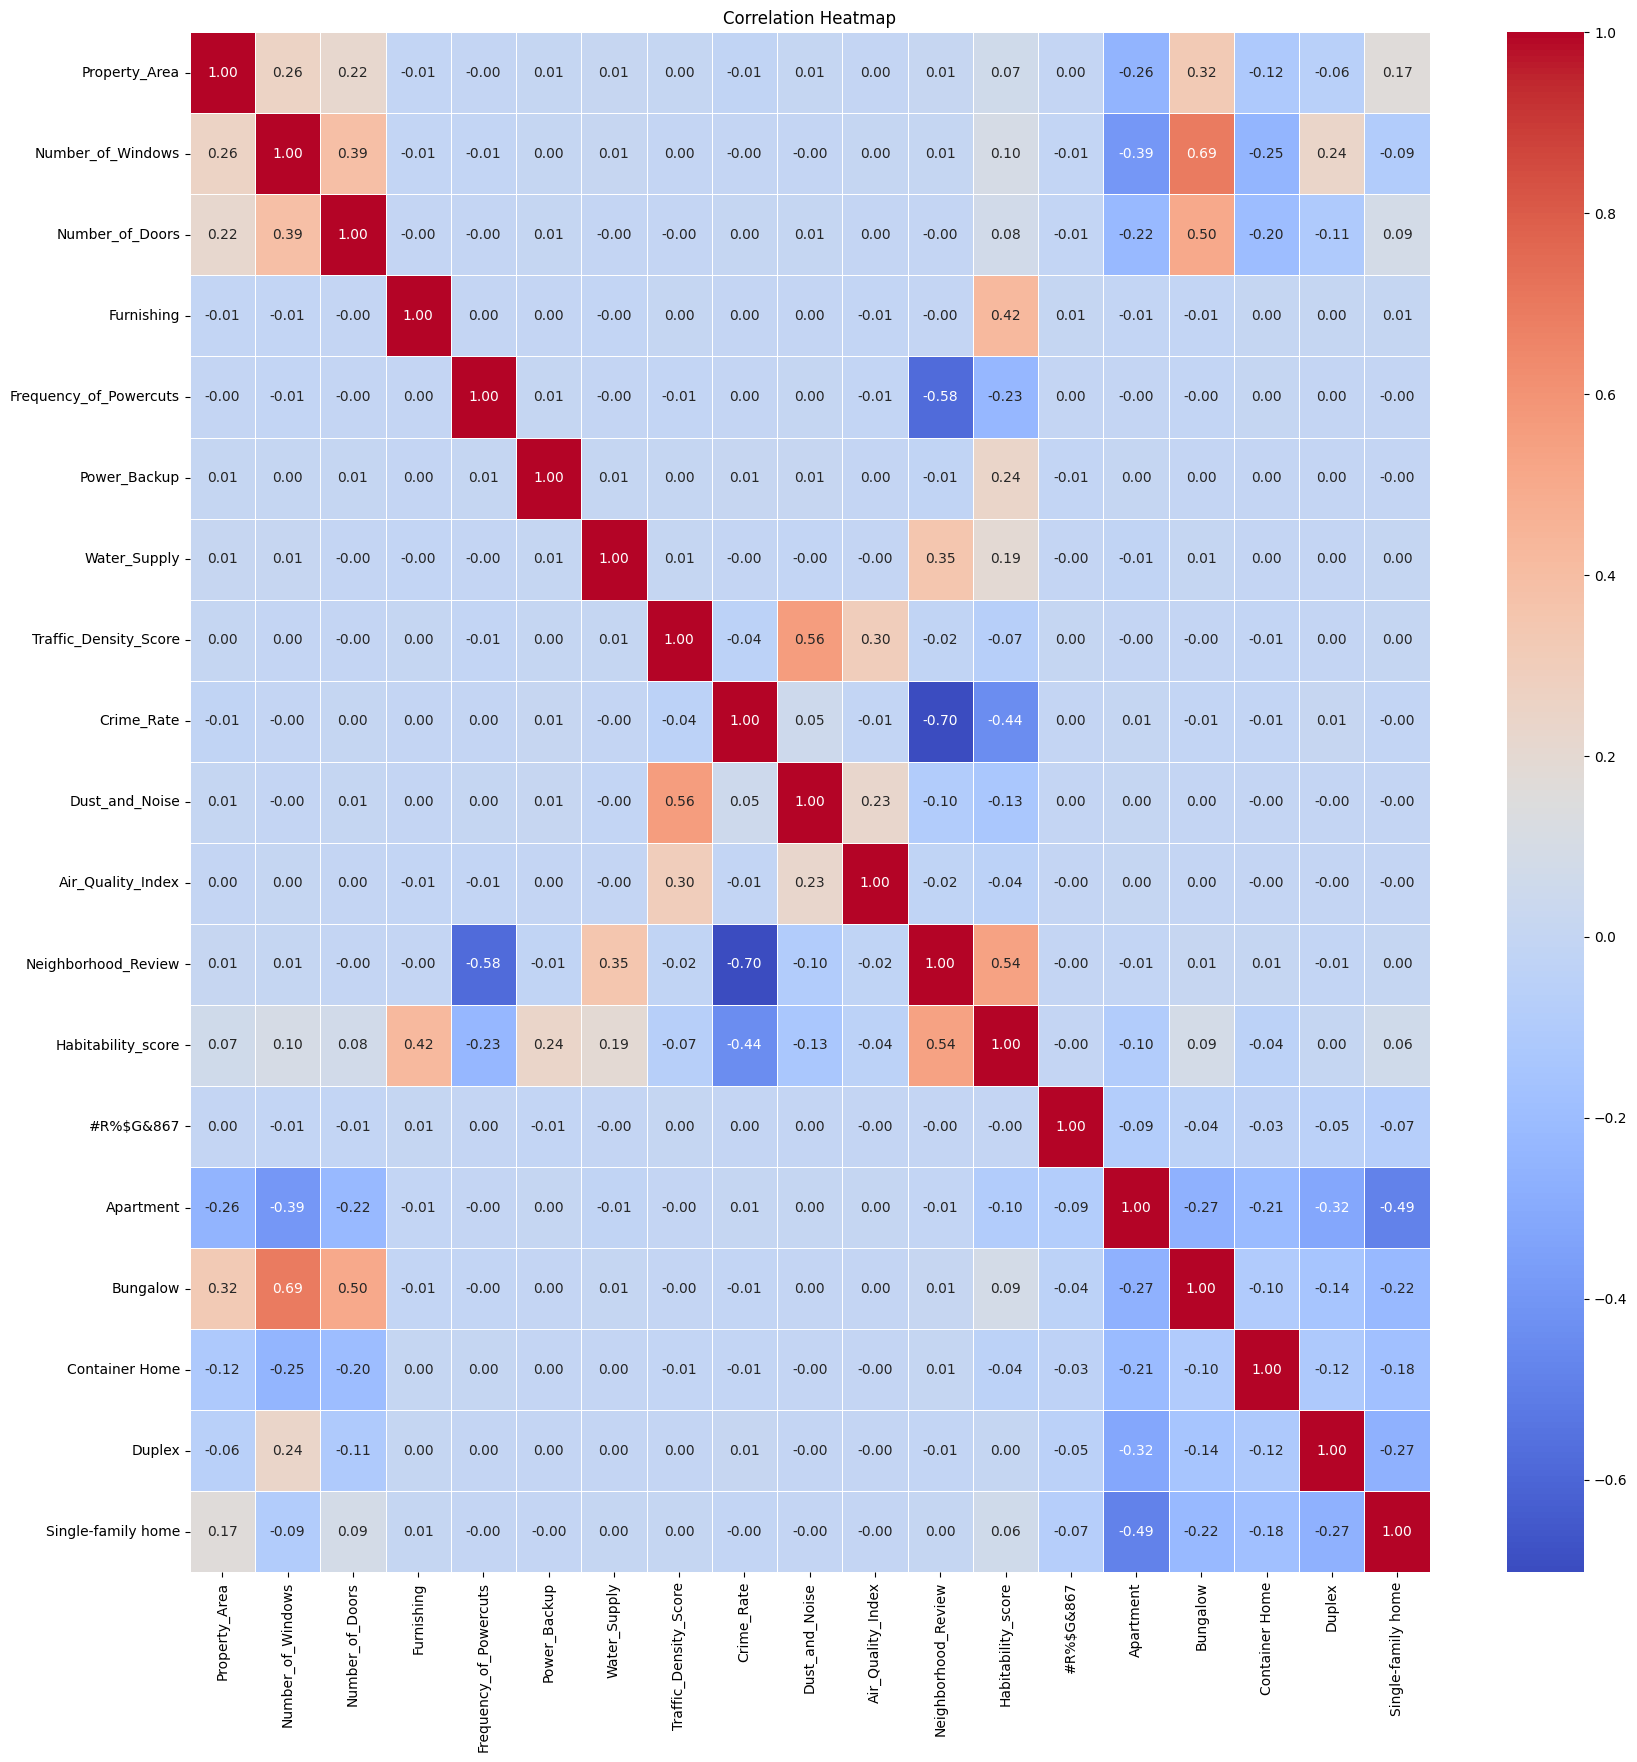

In [783]:
import matplotlib.pyplot as plt

correlation_matrix = train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix , annot=True , cmap='coolwarm' , fmt='.2f' , linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Outlier detection using normalization

In [784]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Area           31599 non-null  int64  
 1   Number_of_Windows       31599 non-null  float64
 2   Number_of_Doors         31599 non-null  int64  
 3   Furnishing              31599 non-null  float64
 4   Frequency_of_Powercuts  31599 non-null  float64
 5   Power_Backup            31599 non-null  float64
 6   Water_Supply            31599 non-null  float64
 7   Traffic_Density_Score   31599 non-null  float64
 8   Crime_Rate              31599 non-null  float64
 9   Dust_and_Noise          31599 non-null  float64
 10  Air_Quality_Index       31599 non-null  float64
 11  Neighborhood_Review     31599 non-null  float64
 12  Habitability_score      31599 non-null  float64
 13  #R%$G&867               31599 non-null  float64
 14  Apartment               31599 non-null

In [785]:
def detectOutliers(df):
    outlier_indices = []
    threshold = 3
    for col in df.columns:
        mean = np.mean(df[col])
        std = np.std(df[col])
        outliers = (df[col] - mean)>threshold*std
        outlier_indices.extend(outliers[outliers].index)
    
    return list(set(outlier_indices))

#outlier_idices = detectOutliers(train)
#train=train.drop(outlier_idices)

#len(outlier_idices)

In [786]:
#print(len(outlier_idices) == len(set(outlier_idices)))

In [787]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Area           31599 non-null  int64  
 1   Number_of_Windows       31599 non-null  float64
 2   Number_of_Doors         31599 non-null  int64  
 3   Furnishing              31599 non-null  float64
 4   Frequency_of_Powercuts  31599 non-null  float64
 5   Power_Backup            31599 non-null  float64
 6   Water_Supply            31599 non-null  float64
 7   Traffic_Density_Score   31599 non-null  float64
 8   Crime_Rate              31599 non-null  float64
 9   Dust_and_Noise          31599 non-null  float64
 10  Air_Quality_Index       31599 non-null  float64
 11  Neighborhood_Review     31599 non-null  float64
 12  Habitability_score      31599 non-null  float64
 13  #R%$G&867               31599 non-null  float64
 14  Apartment               31599 non-null

In [788]:
def CleanOutliers(df):
    cleaned_df = df.copy()

    for col in df.columns:
        sorted_col = df[col].sort_values()
        q1 , q3 = np.percentile(sorted_col , [25,75])
        iqr = q3 - q1

        lower_bound = q1 - (1.5*iqr)
        upper_bound = q3 + (1.5*iqr)

        outliers_index = df[(df[col]<lower_bound) | (df[col]>upper_bound)].index
        print(len(outliers_index))
        cleaned_df = cleaned_df.drop(outliers_index)

        return cleaned_df
    
#train = CleanOutliers(train)


In [789]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_Area           31599 non-null  int64  
 1   Number_of_Windows       31599 non-null  float64
 2   Number_of_Doors         31599 non-null  int64  
 3   Furnishing              31599 non-null  float64
 4   Frequency_of_Powercuts  31599 non-null  float64
 5   Power_Backup            31599 non-null  float64
 6   Water_Supply            31599 non-null  float64
 7   Traffic_Density_Score   31599 non-null  float64
 8   Crime_Rate              31599 non-null  float64
 9   Dust_and_Noise          31599 non-null  float64
 10  Air_Quality_Index       31599 non-null  float64
 11  Neighborhood_Review     31599 non-null  float64
 12  Habitability_score      31599 non-null  float64
 13  #R%$G&867               31599 non-null  float64
 14  Apartment               31599 non-null

In [790]:
X = train.drop(columns=train.columns[12])
Y = train.iloc[: , 12]

In [791]:
test.drop(columns=['#R%$G&867', 'Duplex', 'Air_Quality_Index'] , inplace=True)
X.drop(columns=['#R%$G&867', 'Duplex', 'Air_Quality_Index'] , inplace=True)

In [792]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

train_x , test_x , train_y , test_y = train_test_split(X , Y , test_size=0.2 , random_state=42)
RFR = RandomForestRegressor(n_estimators=108 , random_state=42)

RFR.fit(train_x , train_y)

RandomForestRegressor(n_estimators=108, random_state=42)

In [793]:
y_predict = RFR.predict(test_x)

In [794]:
print(y_predict)

[73.30555556 69.36731481 26.06092593 ... 82.8112963  75.98481481
 79.16305556]


In [795]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error ,r2_score

mae = mean_absolute_error(test_y , y_predict)
mse = mean_squared_error(test_y , y_predict)
rmse = root_mean_squared_error(test_y , y_predict)
r2 = r2_score(test_y , y_predict)

print("Mean Absolute error : " , mae)
print("Mean squared error : ", mse)
print("Root mean squared error : ", rmse)
print("R^2 score : ", r2)

Mean Absolute error :  4.489294479606189
Mean squared error :  35.14123225323836
Root mean squared error :  5.928004069941109
R^2 score :  0.8151943533640544


In [796]:
test_subject = test.iloc[: , 1:]

In [797]:
Habitability_score = RFR.predict(test_subject)
rounded_predications = np.round(Habitability_score , 2)

In [798]:
test.loc[: , 'Habitability_score'] = rounded_predications

In [799]:
test.head()

,Id,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Neighborhood_Review,Apartment,Bungalow,Container Home,Single-family home,Habitability_score
0,0x6808,1521,5.0,1,0.0,0.0,1.0,4.0,7.61,0.0,1.0,4.71,0.0,0.0,0.0,1.0,76.52
1,0x6a98,2233,2.0,1,1.0,0.0,1.0,3.0,5.28,0.0,1.0,4.50,0.0,0.0,0.0,1.0,74.85
2,0xacc0,986,1.0,1,0.0,0.0,1.0,4.0,7.72,0.0,1.0,4.79,1.0,0.0,0.0,0.0,79.70
3,0x8225,1625,2.0,1,1.0,0.0,1.0,2.0,6.19,0.0,1.0,4.09,0.0,0.0,0.0,1.0,84.61
4,0xaee8,1166,2.0,2,2.0,0.0,1.0,2.0,5.84,1.0,1.0,3.56,0.0,0.0,0.0,1.0,72.77


In [800]:
final_dataset = test.iloc[: ,[0 , -1]]
column_names = list(final_dataset.columns)
#final_dataset.to_csv('ML Olympiad - Sustainable Urban Living submission10.csv' , index=False , header=column_names)